In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Seaborn设置
sns.set(style='darkgrid', color_codes=True)  # 设置背景

# Matplotlib设置
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('arima_data.xls', index_col='日期')


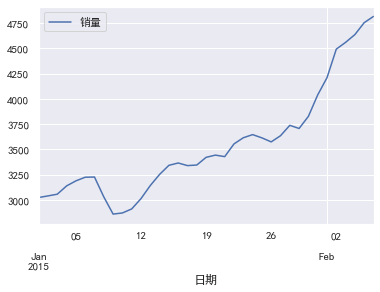

In [4]:
df.plot()

自相关图&平稳性检验
自相关

统计相关性总结了两个变量之间的关系强度。我们可以假设每个变量的分布都符合高斯(钟形曲线)分布。如果是这样，我们可以使用皮尔逊相关系数（Pearson
correlation coefficient）来总结变量之间的相关性。

皮尔逊相关系数是-1和1之间的数字分别描述负相关或正相关。值为零表示无相关。

我们可以使用以前的时间步长来计算时间序列观测的相关性。由于时间序列的相关性与之前的相同系列的值进行了计算，这被称为序列相关或自相关。

一个时间序列的自相关系数被称为自相关函数，或简称ACF。这个图被称为相关图或自相关图。


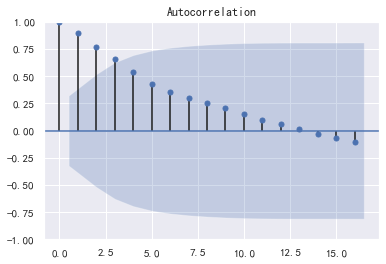

原始序列的ADF检验结果为:
 (1.813771015094526, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.4698986602418)


In [5]:
# 自相关图
plot_acf(df)
plt.show()
# 自相关系数长期大于零，说明时间序列有很强的相关性

# 平稳性检验
print('原始序列的ADF检验结果为:\n', ADF(df['销量']))

差分时序图

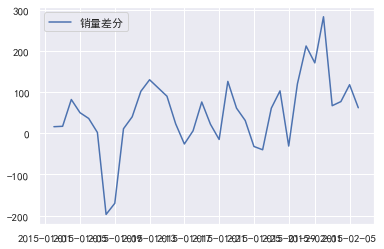

In [6]:
# 1阶差分
d_data = df['销量'].diff().dropna()
d_data.columns = ['销量差分']
plt.plot(d_data, label='销量差分')
plt.legend(loc='best')
plt.show()

差分自相关图&平稳性检验

基本用法
statsmodels.tsa.stattools.adfuller(
    x,
    maxlag = None,
    regression ='c',
    autolag ='AIC',
    store = False,
    regresults = False )
    
adfuller(price_A)
'''
(-2.0226025821924765, 
 0.27675142429522215, 
54, 
101983, 
{'1%': -3.430414123085256,
'5%': -2.861568341405142, 
'10%': -2.566785085137168},
 -915434.180263706)

那么这些值都是什么意思呢？，我挑个人觉得比较重要的几个讲
第一行——统计值，用于和下边 1%，5%，和10%临界值比较。但更方便的是直接用下边的p值
第二行——p值，即数据不平稳的概率
第三行——延迟
第四行——本次检测用到的观测值个数
第五~第七行——1%、5%、10%标准下的临界值

如何确定数据是否平稳？
有两种看法

1）1%、%5、%10不同程度拒绝原假设的统计值【第五~第七行】和 Test result【第一行】的比较，Test result同时小于1%、5%、10%即说明非常好地拒绝该假设
本数据中，adf结果为-2.02， 大于三个level的统计值。所以是不平稳的
2）P-value是否非常接近0，接近0，则是平稳的，否则，不平稳。

原文链接：https://blog.csdn.net/qq_40206371/article/details/121101760

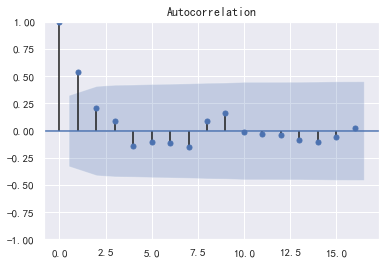

差分序列的ADF检验结果为:
 (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


In [7]:
# 自相关图
plot_acf(d_data)
plt.show()

# 平稳性检验
print('差分序列的ADF检验结果为:\n', ADF(d_data))
# 检验结果-.3156，大于1%，小于5%的拒绝原假设的统计值，接受平稳


一阶差分后时序图在均值附近平稳波动，自相关图有较强的短期相关性，P值小于0.05，所以一阶差分后的序列是平稳序列

In [9]:
#定义ADF输出格式化函数
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('ADF检验结果:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
 
#对数据集使用ADF检验
# adf_test(train['#Passengers'])

In [10]:
adf_test(d_data)

ADF检验结果:
Test Statistic                 -3.156056
p-value                         0.022673
Number of Lags Used             0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


差分序列白噪声检验
p值小于0.05，说明是平稳且非白噪声序列

acorr_ljungbox(x, lags=None, boxpierce=False) # 数据的纯随机性检验函数 
lags：为延迟期数，如果为整数，则是包含在内的延迟期数，如果是一个列表或数组，那么所有时滞都包含在列表中最大的时滞中 
boxpierce：为True时表示除开返回LB统计量还会返回Box和Pierce的Q统计量 
返回值： 
lbvalue:测试的统计量
pvalue:基于卡方分布的p统计量 

输出检验结果中会返回两个值：

lbvalue: 测试的统计量
pvalue: 基于卡方分布的p统计量。
如果p-value>0.05则可判断为白噪声序列.

bpvalue:((optionsal), float or array) – 基于 Box-Pierce 的检验的p统计量 
bppvalue:((optional), float or array) – 基于卡方分布下的Box-Pierce检验的p统计量

In [8]:
# 白噪声检验
print('差分序列的白噪声检验结果为:\n', acorr_ljungbox(d_data, lags=1))


差分序列的白噪声检验结果为:
      lb_stat  lb_pvalue
1  11.304022   0.000773


p值小于0.05，说明是平稳且非白噪声序列

差分序列偏自相关系数PACF

C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


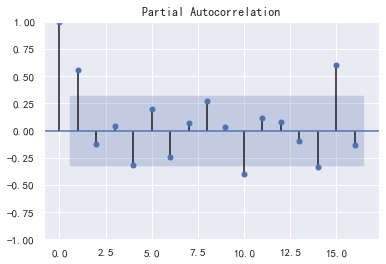

In [14]:
# 偏自相关系数 pacf
plot_pacf(d_data)
plt.show()


ARIMA模型（英语：Autoregressive Integrated Moving Average model），差分整合移动平均自回归模型，又称整合移动平均自回归模型（移动也可称作滑动），是时间序列预测分析方法之一。ARIMA(p，d，q)中，AR是“自回归”，p为自回归项数；MA为“滑动平均”，q为滑动平均项数，d为使之成为平稳序列所做的差分次数（阶数）。“差分”一词虽未出现在ARIMA的英文名称中，却是关键步骤。


In [49]:
from statsmodels.tsa.arima.model import ARIMA
# 定阶
df['销量'] = df['销量'].astype(float)  # 转换为float类型
pmax = int(len(d_data) / 10)
qmax = int(len(d_data) / 10)
bic_matrix = []  # bic矩阵
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(ARIMA(df, order=(p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
    
print('*'*20)    
print(bic_matrix)
bic_matrix = pd.DataFrame(bic_matrix)

# bic_matrix
print('-'*20)
print(bic_matrix)

p, q = bic_matrix.stack().astype('float64').idxmin()
print('BIC最小的p值和q值为:%s. %s' % (p, q))


C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freque

C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freque

********************
[[438.40889266001903, 424.35050659189903, 427.6535595828169, 426.41822085730945], [422.817414883257, 426.3013233712491, 428.1513898166602, 429.74690851750046], [426.3390714267073, 426.66022693563957, 429.95381925396936, 433.2141304102066], [429.54731418552717, 429.82566773256326, 433.28396726406226, 432.60892135741256]]
--------------------
            0           1           2           3
0  438.408893  424.350507  427.653560  426.418221
1  422.817415  426.301323  428.151390  429.746909
2  426.339071  426.660227  429.953819  433.214130
3  429.547314  429.825668  433.283967  432.608921
BIC最小的p值和q值为:1. 0


C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
# 建立模型
print(p,q)
model = ARIMA(df, order=(p, 1, q)).fit()
model.summary(2)  # 绘制一份模型报告

1 0


C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zq\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     销量   No. Observations:                   37
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -207.825
Date:                Thu, 06 Oct 2022   AIC                            419.650
Time:                        16:52:41   BIC                            422.817
Sample:                    01-01-2015   HQIC                           420.756
                         - 02-06-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [1.0        0.0]
------------------------------------------------------------------------------
ar.L1          0.6347      0.109      5.821      0.000         inf        -inf
sigma2      5963.5744   1327.260      4.493      0.000         inf        -inf
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.91   Prob(JB):                         0.57
Heteroskedasticity (H):               1.52   Skew:                            -0.30
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
#作为期5天的预测，返回预测结果、标准误差、置信区间。
print(model.forecast(5))

2015-02-07    4856.351924
2015-02-08    4881.328922
2015-02-09    4897.182034
2015-02-10    4907.244138
2015-02-11    4913.630641
Freq: D, Name: predicted_mean, dtype: float64
